In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import cv2 as cv

from detectron2.engine.defaults import DefaultPredictor
from detectron2.utils.visualizer import Visualizer

from detectron2_examples.mask_rcnn.build import setup
from detectron2_examples.mask_rcnn import PennFudanDataset

/workspace/research/detectron2_examples/detectron2_examples/mask_rcnn/build.py:63: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (
/workspace/research/detectron2_examples/detectron2_examples/mask_rcnn/build.py:67: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


In [3]:
class Args:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

In [6]:
config = '../logs/mask_rcnn2/config.yaml'

args = Args(
    config_file=config,
    weights='../logs/mask_rcnn2/model_0004999.pth',
    output_dir='./',
    root='../../datasets/penn_fudan_pen/'
)

cfg = setup(args)

[04/30 08:41:15 detectron2]: Rank of current process: 0. World size: 1
[04/30 08:41:15 detectron2]: Environment info:
----------------------  ---------------------------------------------------------
sys.platform            linux
Python                  3.8.5 (default, Sep  4 2020, 07:30:14) [GCC 7.3.0]
numpy                   1.19.2
detectron2              0.4 @/workspace/detectron2/detectron2
Compiler                GCC 7.5
CUDA compiler           not available
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.1 @/opt/conda/lib/python3.8/site-packages/torch
PyTorch debug build     False
GPU available           True
GPU 0                   GeForce RTX 3080 (arch=8.6)
CUDA_HOME               /usr/local/cuda
Pillow                  8.1.0
torchvision             0.8.2 @/opt/conda/lib/python3.8/site-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5, 8.0
fvcore                  0.1.5.post20210415
iopath                  0.1.8
cv2                     4.5.1
---

[04/30 08:42:06 fvcore.common.checkpoint]: [Checkpointer] Loading from ../logs/mask_rcnn2/model_0004999.pth ...


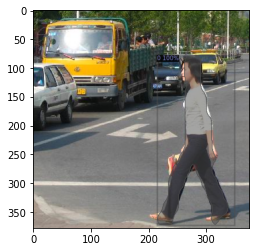

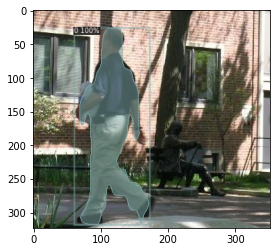

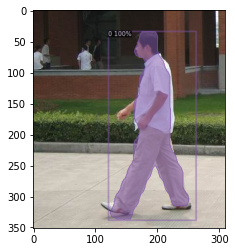

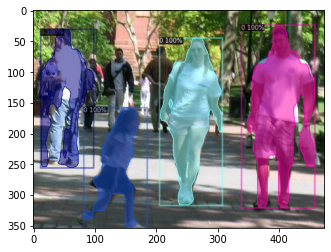

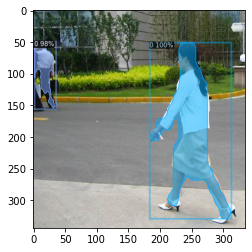

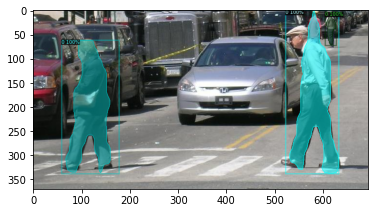

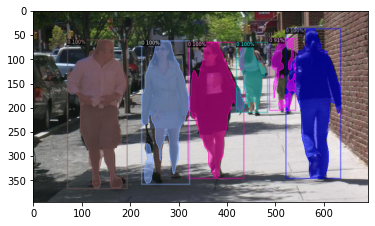

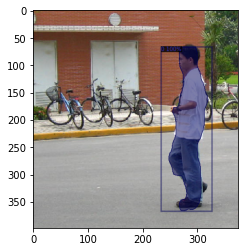

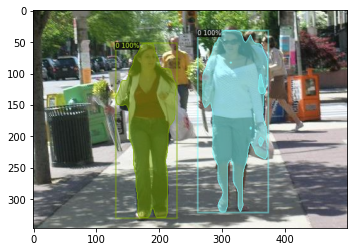

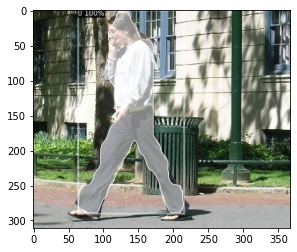

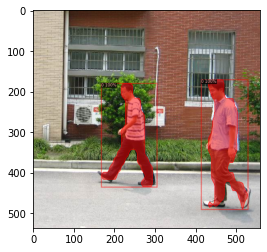

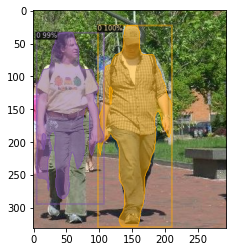

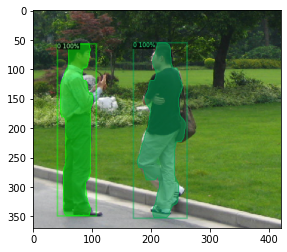

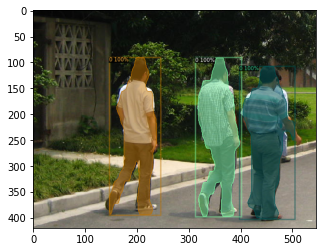

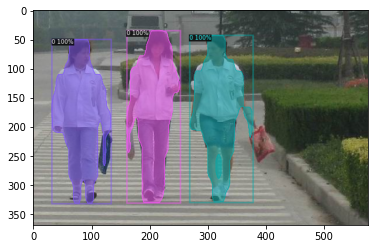

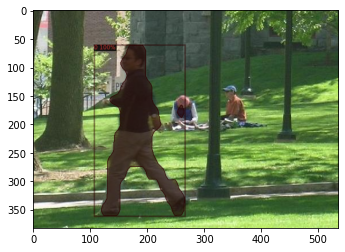

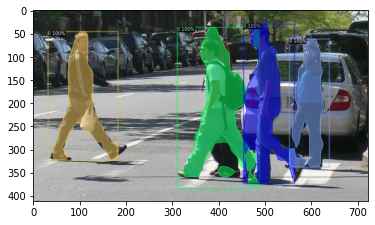

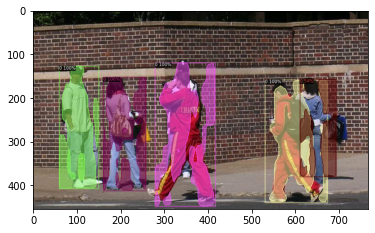

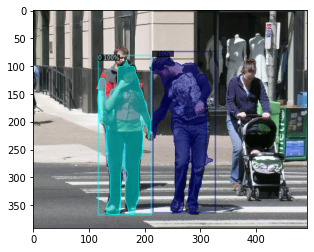

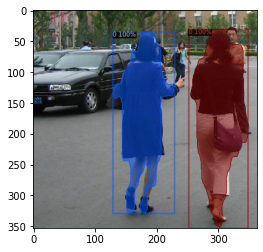

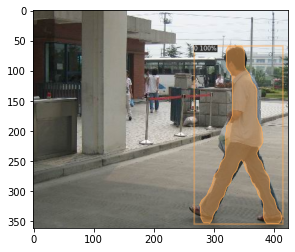

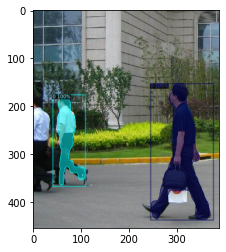

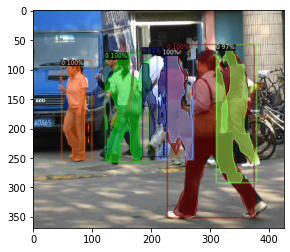

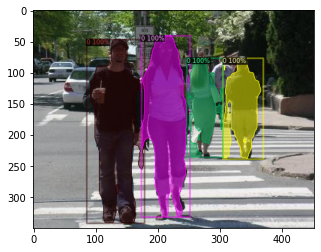

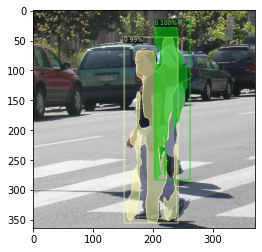

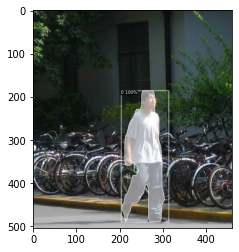

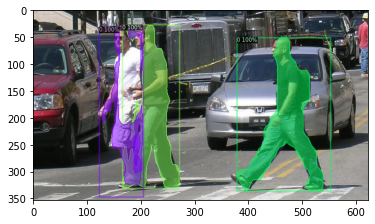

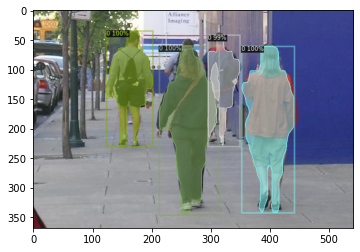

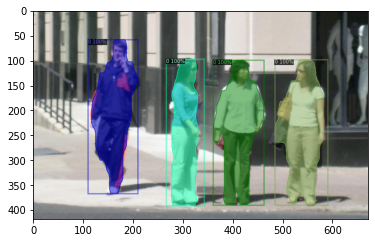

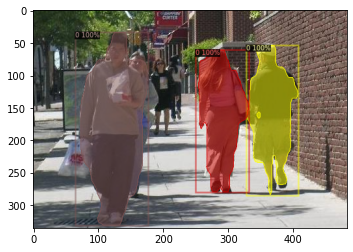

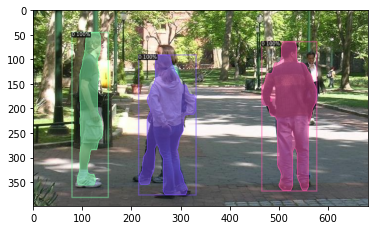

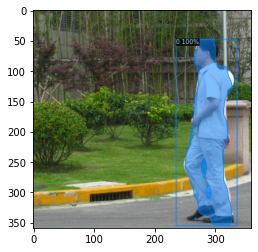

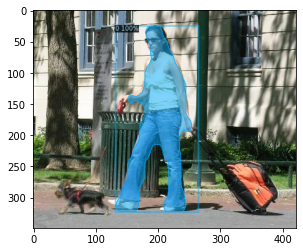

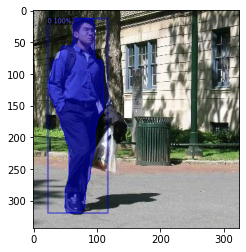

In [8]:
predictor = DefaultPredictor(cfg)

dataset = PennFudanDataset(args.root, is_train=False)
dataset()

for index in range(len(dataset.dataset)):
    image, target = dataset.get(index)
    r = predictor(image)
    
    instances = r['instances'].to('cpu')
    
    viz = Visualizer(image)
    viz_image = viz.draw_instance_predictions(instances)
    image = viz_image.get_image()
    
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()